# **Milestone 2**

## **Model Building**

1. What we want to predict is the "Price". We will use the normalized version 'price_log' for modeling.
2. Before we proceed to the model, we'll have to encode categorical features. We will drop categorical features like Name. 
3. We'll split the data into train and test, to be able to evaluate the model that we build on the train data.
4. Build Regression models using train data.
5. Evaluate the model performance.

**Note:** Please load the data frame that was saved in Milestone 1 here before separating the data, and then proceed to the next step in Milestone 2.

# Data Preparation for Model Building

### **Load the data**

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

#Import library for plotting data. 
import matplotlib.pyplot as plt

#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
cars_data = pd.read_csv("cars_data_updated.csv")

In [4]:
cars_data.shape

(7249, 16)

In [5]:
cars_data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,kilometers_driven_log,price_log,Brand,Model
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,11.184421,0.559616,Maruti,WagonR
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,10.621327,2.525729,Hyundai,Creta1.6
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,10.736397,1.504077,Honda,JazzV
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,11.373663,1.791759,Maruti,ErtigaVDI
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,10.613246,2.875822,Audi,A4New


In [6]:
# This drops all records that have null values in price_log
cars_data.dropna(subset=["price_log"], inplace=True)

In [7]:
#check data types
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6016 entries, 0 to 6015
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   6016 non-null   object 
 1   Location               6016 non-null   object 
 2   Year                   6016 non-null   int64  
 3   Kilometers_Driven      6016 non-null   int64  
 4   Fuel_Type              6016 non-null   object 
 5   Transmission           6016 non-null   object 
 6   Owner_Type             6016 non-null   object 
 7   Mileage                6016 non-null   float64
 8   Engine                 6016 non-null   float64
 9   Power                  6016 non-null   float64
 10  Seats                  6016 non-null   float64
 11  Price                  6016 non-null   float64
 12  kilometers_driven_log  6016 non-null   float64
 13  price_log              6016 non-null   float64
 14  Brand                  6016 non-null   object 
 15  Mode

In [8]:
cars_data.shape

(6016, 16)

In [9]:
#count of unique features
cars_data.nunique()

Name                     1874
Location                   11
Year                       22
Kilometers_Driven        3092
Fuel_Type                   4
Transmission                2
Owner_Type                  4
Mileage                   430
Engine                    145
Power                     369
Seats                       8
Price                    1373
kilometers_driven_log    3092
price_log                1373
Brand                      30
Model                     687
dtype: int64

In [10]:
## Check total number of missing values of each column. Hint: Use isnull() method
cars_data.isnull().sum()

Name                     0
Location                 0
Year                     0
Kilometers_Driven        0
Fuel_Type                0
Transmission             0
Owner_Type               0
Mileage                  0
Engine                   0
Power                    0
Seats                    0
Price                    0
kilometers_driven_log    0
price_log                0
Brand                    0
Model                    0
dtype: int64

<AxesSubplot:>

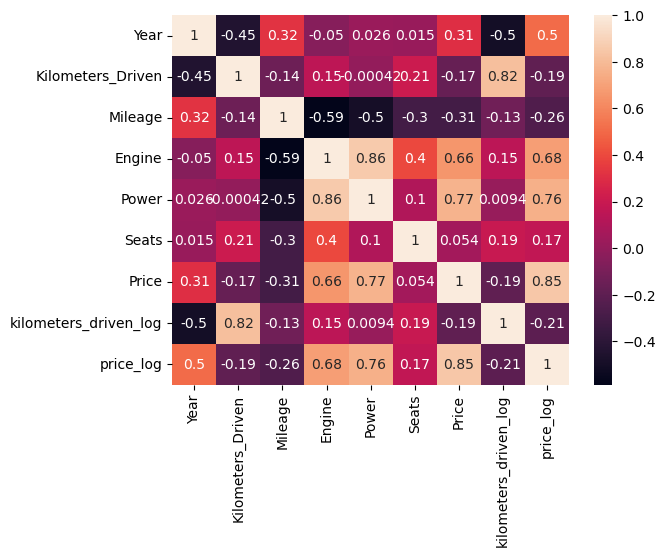

In [11]:
# Visualization of correlation
# import pandas as pd  - already imported at the beginning
import seaborn as sns

# calculate the correlation matrix
corr = cars_data.corr()

# create a heatmap of the correlation matrix
sns.heatmap(corr, annot=True)

### **Split the Data**

<li>Step1: Seperating the indepdent variables (X) and the dependent variable (y). 
<li>Step2: Encode the categorical variables in X using pd.dummies.
<li>Step3: Split the data into train and test using train_test_split.

**Think about it:** Why we should drop 'Name','Price','price_log','Kilometers_Driven' from X before splitting?

SPLITTING THE DATA
In linear regression, we are trying to build a model to predict the value of a dependent variable based on the values of one or more independent variables. When splitting the data into training and testing sets, it's important to drop the dependent variable from the dataset we use for training the model. This is because the model should not have access to the dependent variable during the training process, as it would not be reflective of real-world scenarios when we use the model to make predictions on new, unseen data. If the dependent variable is included in the training data, the model may simply memorize the data rather than learn the underlying relationships between the independent and dependent variables. By only using the independent variables to train the model, we can ensure that it has learned the underlying relationships and is able to make accurate predictions on new data.

Name should be dropped as it has too many unique values and we will use Brand and/or Model instead.
Price and price_log should be dropped when building the model
Kilometers_Driven is replaced by its log


TESTING THE DATA
Note that the dependent variable data is typically only used during the evaluation of the model. This means that after the model has been trained on the training data, which does not include the target variable, the model is then tested on a separate set of data called the testing data. The testing data should include the target variable, so that we can compare the predictions made by the model to the actual values of the target variable in the testing data. This allows us to evaluate the performance of the model and determine how well it is able to make predictions on new, unseen data. The evaluation metric used could be mean squared error, R squared, adjusted R squared etc. In summary, the dependent variable data is not used during the training process, but is used during the evaluation process to measure the model's performance.

In [12]:
# Step-1
X = cars_data.drop(['Name','Price','price_log','Kilometers_Driven'], axis = 1)
y = cars_data[["price_log", "Price"]]

In [13]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6016 entries, 0 to 6015
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Location               6016 non-null   object 
 1   Year                   6016 non-null   int64  
 2   Fuel_Type              6016 non-null   object 
 3   Transmission           6016 non-null   object 
 4   Owner_Type             6016 non-null   object 
 5   Mileage                6016 non-null   float64
 6   Engine                 6016 non-null   float64
 7   Power                  6016 non-null   float64
 8   Seats                  6016 non-null   float64
 9   kilometers_driven_log  6016 non-null   float64
 10  Brand                  6016 non-null   object 
 11  Model                  6016 non-null   object 
dtypes: float64(5), int64(1), object(6)
memory usage: 611.0+ KB


In [14]:
y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6016 entries, 0 to 6015
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   price_log  6016 non-null   float64
 1   Price      6016 non-null   float64
dtypes: float64(2)
memory usage: 141.0 KB


In [15]:
# Check total number of missing values of each column in X. Hint: Use isnull() method
X.isnull().sum()

Location                 0
Year                     0
Fuel_Type                0
Transmission             0
Owner_Type               0
Mileage                  0
Engine                   0
Power                    0
Seats                    0
kilometers_driven_log    0
Brand                    0
Model                    0
dtype: int64

In [16]:
# Check total number of missing values of each column in y. Hint: Use isnull() method
y.isnull().sum()

price_log    0
Price        0
dtype: int64

In [17]:
# Step-2 Use pd.get_dummies(drop_first = True)
X = pd.get_dummies(X, drop_first = True)

In [18]:
X.head()

,Year,Mileage,Engine,Power,Seats,kilometers_driven_log,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,...,Model_i201.4,Model_i202015-2017,Model_i20Active,Model_i20Asta,Model_i20Diesel,Model_i20Era,Model_i20Magna,Model_i20Sportz,Model_redi-GOS,Model_redi-GOT
0,2010,26.60,998.0,58.16,5.0,11.184421,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2015,19.67,1582.0,126.20,5.0,10.621327,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2011,18.20,1199.0,88.70,5.0,10.736397,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2012,20.77,1248.0,88.76,7.0,11.373663,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2013,15.20,1968.0,140.80,5.0,10.613246,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
#Check shape of X
X.shape

(6016, 738)

In [20]:
#Check shape of y
y.shape

(6016, 2)

In [21]:
# Import library for preparing data
from sklearn.model_selection import train_test_split

In [22]:
# Step-3 Splitting data into training and test set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(4211, 738) (1805, 738) (4211, 2) (1805, 2)


Next, we define the function that we will use to evaluate each model created in this notebook. We use this model to determine the best solution to our business problem.

1) The get_model_score function uses R2
2) The get_model_score_adjusted_R2 uses Adjusted R2

This code perform evaluation of a given regression model. The function takes the regression 
model as an input and returns a list of four scores: the training set R-square, the test set 
R-square, the training set RMSE, and the test set RMSE.

The code first makes predictions on the training and test sets using the input model, 
and then uses the R-square and RMSE metrics from the scikit-learn library to evaluate 
the performance of the model. The scores are then stored in the 'score_list' list and 
returned at the end of the function.

Additionally, if the flag input is set to True (which is the default), the function will also
print the R-square and RMSE scores for both the training and test sets.

In [23]:
#Let us write a function for calculating r2_score and RMSE on train and test data
#This function takes model as an input on which we have trained particular algorithm
#The categorical column as the input and returns the boxplots and histograms for the variable

def get_model_score(model, flag = True):
    '''
    model : regressor to predict values of X

    '''
    # Defining an empty list to store train and test results
    score_list = [] 
    
    pred_train = model.predict(X_train)
    
    pred_train_ = np.exp(pred_train)
    
    pred_test = model.predict(X_test)
    
    pred_test_ = np.exp(pred_test)
    
    train_r2 = metrics.r2_score(y_train['Price'], pred_train_)
    
    test_r2 = metrics.r2_score(y_test['Price'], pred_test_)
    
    train_rmse = metrics.mean_squared_error(y_train['Price'], pred_train_, squared = False)
    
    test_rmse = metrics.mean_squared_error(y_test['Price'], pred_test_, squared = False)

   
    # Adding all scores in the list
    score_list.extend((train_r2, test_r2, train_rmse, test_rmse))
    
    # If the flag is set to True then only the following print statements will be dispayed, the default value is True
    if flag == True: 
        
        print("R-square on training set : ", metrics.r2_score(y_train['Price'], pred_train_))
        
        print("R-square on test set : ", metrics.r2_score(y_test['Price'], pred_test_))
        
        print("RMSE on training set : ", np.sqrt(metrics.mean_squared_error(y_train['Price'], pred_train_)))
        
        print("RMSE on test set : ", np.sqrt(metrics.mean_squared_error(y_test['Price'], pred_test_)))
    
    # Returning the list with train and test scores
    return score_list

In [24]:
# This function uses Adjusted R2

def get_model_score_adjusted_R2(model, flag = True):
    '''
    model : regressor to predict values of X
    '''
    pred_train = model.predict(X_train)
    pred_train_ = np.exp(pred_train)
    pred_test = model.predict(X_test)
    pred_test_ = np.exp(pred_test)
    
    n = X_train.shape[0]
    p = X_train.shape[1]
    train_r2 = 1 - (1-metrics.r2_score(y_train['Price'], pred_train_))*(n-1)/(n-p-1)
    n = X_test.shape[0]
    p = X_test.shape[1]
    test_r2 = 1 - (1-metrics.r2_score(y_test['Price'], pred_test_))*(n-1)/(n-p-1)
    
    train_rmse = np.sqrt(metrics.mean_squared_error(y_train['Price'], pred_train_))
    test_rmse = np.sqrt(metrics.mean_squared_error(y_test['Price'], pred_test_))
    
    score_list_adjusted_R2 = [train_r2, test_r2, train_rmse, test_rmse]
    
    if flag:
        print("Adjusted R2 on training set : ", train_r2)
        print("Adjusted R2 on test set : ", test_r2)
        print("RMSE on training set : ", train_rmse)
        print("RMSE on test set : ", test_rmse)
    
    return score_list_adjusted_R2

<hr>

For Regression Problems, some of the algorithms used are :<br>

**1) Linear Regression** <br>
**2) Ridge / Lasso Regression** <br>
**3) Decision Trees** <br>
**4) Random Forest** <br>

# Linear Regression

### **Fitting a linear model**

Linear Regression can be implemented using: <br>

**1) Sklearn:** https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html <br>
**2) Statsmodels:** https://www.statsmodels.org/stable/regression.html

# LR - Sklearn

In [25]:
# Import Linear Regression from sklearn
from sklearn.linear_model import LinearRegression

# Create a linear regression model
lr = LinearRegression()

# Fit linear regression model
lr.fit(X_train, y_train['price_log']) 


LinearRegression()

In [26]:
# Get score of the model
LR_score = get_model_score(lr)

R-square on training set :  0.9632326167143936
R-square on test set :  0.8884457821245254
RMSE on training set :  2.1857914088366726
RMSE on test set :  3.541569655485


In [27]:
print(LR_score)

[0.9632326167143936, 0.8884457821245254, 2.1857914088366726, 3.541569655485]


In [28]:
X.shape

(6016, 738)

In [29]:
y.shape

(6016, 2)

Checking for the assumptions and rebuilding the model

1. Mean of residuals should be 0
2. Normality of error terms
3. Linearity of variables
4. No heteroscedasticity

1. Mean of Residuals.  In order to meet the criteria, mean should be close to 0.
The code fits an ordinary least squares (OLS) regression model using the statsmodels library in Python. The dependent variable (y_train) and independent variables (X_train) are inputted into the model. 
The model is then fit using the .fit() method and the summary of the fit is printed using .summary(). 
The summary provides information about the regression coefficients, goodness of fit measures, statistical tests, and diagnostics.

In [30]:
y_pred = lr.predict(X_test)
residuals = y_test['price_log'] - y_pred
print(residuals)


5460    0.334171
4367   -0.018583
1227    0.166880
2253   -0.359454
79     -0.129142
          ...   
188    -0.038821
5218    0.135975
3884    0.113695
3978    0.024030
2698    0.031614
Name: price_log, Length: 1805, dtype: float64


In [31]:
residuals.mean()

-0.010740112265732153

2. Test for Normality of Error Terms.  We do this by plotting a histogram of residuals.  They should be normal.

<AxesSubplot:xlabel='price_log', ylabel='Count'>

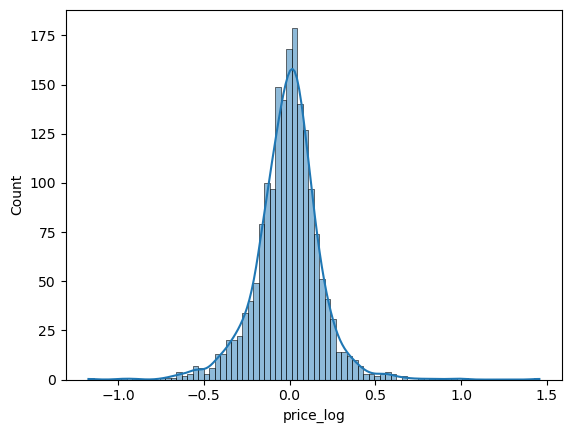

In [32]:
sns.histplot(residuals, kde = True)

3. Linearity of Variables - they should be randomly and uniformly scattered on the x-axis.
Predictor variables must have a linear relation with the dependent variable. To test this assumption, we plot the residuals and the fitted values and ensure that residuals do not form a strong pattern. 

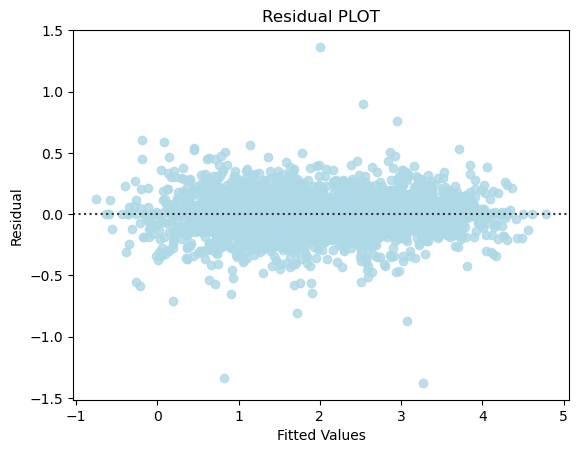

In [33]:
# Predicted values
fitted = lr.predict(X_train)
residuals = y_train['price_log'] - fitted

#fitted = ols_res_1.fittedvalues
sns.residplot(x = fitted, y = residuals, color = "lightblue")
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Residual PLOT")
plt.show()

4. No Heteroscedasticity/Test for Homoscedasticity.  Homoscedasticity: if the variance of the residuals are symmetrically distributed across the regression line, then the data is said to homoscedastic. Heteroscedasticity: if the variance is unequal for the residuals across the regression line, then the data is said to be heteroscedastic. In this case, the residuals can form an arrow shape or any other non symmetrical shape.

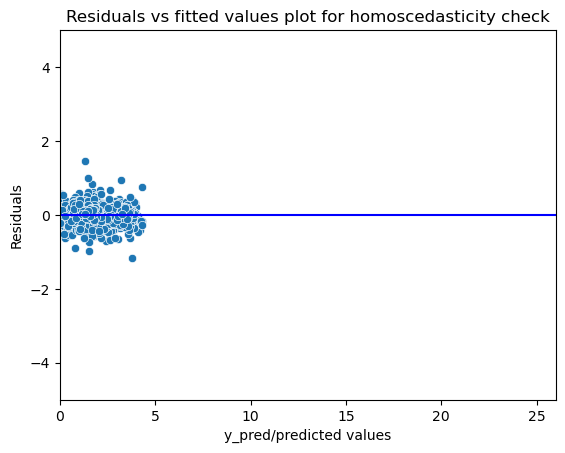

In [34]:
import seaborn as sns

y_pred = lr.predict(X_test)
residuals = y_test['price_log'] - y_pred

p = sns.scatterplot(y_pred,residuals)

plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-5,5)
plt.xlim(0,26)
p = sns.lineplot([0,26],[0,0],color='blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

In [35]:

# get the coefficients of the linear regression model
coefs = lr.coef_

# create a dataframe to store the coefficients
coef_df = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': coefs})

# sort the dataframe by the magnitude of the coefficients
coef_df['Absolute_Coefficient'] = coef_df['Coefficient'].abs()
coef_df.sort_values(by='Absolute_Coefficient', ascending=False, inplace=True)

# print the feature coefficients
print("Feature Coefficients: \n", coef_df)

Feature Coefficients: 
                Feature   Coefficient  Absolute_Coefficient
162  Model_CayenneBase -3.224471e+00          3.224471e+00
422    Model_MustangV8  1.383597e+00          1.383597e+00
427      Model_NanoSTD -1.252193e+00          1.252193e+00
352      Model_Ikon1.4 -1.231596e+00          1.231596e+00
36   Brand_Lamborghini  1.159825e+00          1.159825e+00
..                 ...           ...                   ...
177    Model_CiazAlpha  3.733125e-15          3.733125e-15
700     Model_XUV500W9  5.551115e-17          5.551115e-17
683       Model_XE2.0L  1.259030e-17          1.259030e-17
715       Model_ZenLXI  0.000000e+00          0.000000e+00
684  Model_XEPortfolio  0.000000e+00          0.000000e+00

[738 rows x 3 columns]


In [36]:
original_columns = [col for col in X_train.columns if '_' not in col]
coef_df = coef_df[coef_df['feature'].isin(original_columns)]
top_5 = coef_df.sort_values(by='coef', ascending=False).head(7)

plt.barh(top_5['feature'], top_5['coef'])
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Top 5 Original Features and Their Coefficients')
plt.show()

KeyError: 'feature'

**Observations from results: _____**

R-square on training set : 0.9632326167144044 and R-square on test set : 0.8884457821246294 are indicating that the model is performing well on both training and test set. A high R-squared value (closer to 1) indicates that the model is explaining a large proportion of the variance in the data. However, in this case, the R-square on the training set is higher than the R-square on the test set, which indicates that the model is overfitting the training data.

RMSE on training set : 2.185791408836351 and RMSE on test set : 3.5415696554833485 are indicating the error of the model on both training and test set. RMSE (Root Mean Squared Error) is a measure of the difference between the predicted and actual values. The lower the RMSE, the better the model. In this case, the RMSE on the training set is lower than the RMSE on the test set, which indicates that the model is not generalizing well to unseen data.

Overall, it seems like the model is overfitting the training data and is not generalizing well to unseen data. 

**Important variables of Linear Regression**

Building a model using statsmodels.

# LR - Statsmodel 1 - R2

In [37]:
# Import Statsmodels 
import statsmodels.api as sm

# Statsmodel api does not add a constant by default. We need to add it explicitly
x_train = sm.add_constant(X_train)

# Add constant to test data
x_test = sm.add_constant(X_test)

def build_ols_model(train):
    
    # Create the model
    olsmodel = sm.OLS(y_train["price_log"], train)
    
    return olsmodel.fit()

# Fit linear model on new dataset
olsmodel1 = build_ols_model(X_train)

print(olsmodel1.summary())

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     204.2
Date:                Thu, 09 Feb 2023   Prob (F-statistic):               0.00
Time:                        22:35:15   Log-Likelihood:                 2207.0
No. Observations:                4211   AIC:                            -3134.
Df Residuals:                    3571   BIC:                             927.1
Df Model:                         639                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Year                  

In [38]:
get_model_score(olsmodel1)

R-square on training set :  0.9632326167142701
R-square on test set :  -1.7677825405890375e+83
RMSE on training set :  2.1857914088403443
RMSE on test set :  4.4582786612795244e+42


[0.9632326167142701,
 -1.7677825405890375e+83,
 2.1857914088403443,
 4.4582786612795244e+42]

In [39]:
# Retrive Coeff values, p-values and store them in the dataframe
olsmod = pd.DataFrame(olsmodel1.params, columns = ['coef'])
olsmod['pval'] = olsmodel1.pvalues

In [40]:
# We are looking for overall significant variables

pval_filter = olsmod['pval']<= 0.05
imp_vars = olsmod[pval_filter].index.tolist()

# We are going to get overall varaibles (un-one-hot encoded varables) from categorical varaibles
sig_var = []
for col in imp_vars:
    if '' in col:
        first_part = col.split('_')[0]
        for c in cars_data.columns:
            if first_part in c and c not in sig_var :
                sig_var.append(c)

                
start = '\033[1m'
end = '\033[95m'
print(start+ 'Most overall significant categorical variables of LINEAR REGRESSION  are ' +end,':\n', sig_var)

Most overall significant categorical variables of LINEAR REGRESSION  are  :
 ['Year', 'Mileage', 'Power', 'kilometers_driven_log', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Brand', 'Model']


# LR - Statsmodel 2 - Adjusted R2

In [41]:
#import statsmodels.api as sm - done before
# Statsmodel api does not add a constant by default. We need to add it explicitly
x_train = sm.add_constant(X_train)

# Add constant to test data
x_test = sm.add_constant(X_test)

def build_ols_model(train):
    
    # Create the model
    olsmodel = sm.OLS(y_train["price_log"], train)
    
    return olsmodel.fit()

# Fit linear model on new dataset
olsmodel2 = build_ols_model(X_train)

print(olsmodel2.summary())

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     204.2
Date:                Thu, 09 Feb 2023   Prob (F-statistic):               0.00
Time:                        22:35:17   Log-Likelihood:                 2207.0
No. Observations:                4211   AIC:                            -3134.
Df Residuals:                    3571   BIC:                             927.1
Df Model:                         639                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Year                  

In [42]:
get_model_score_adjusted_R2(olsmodel2)

Adjusted R2 on training set :  0.9554174298292273
Adjusted R2 on test set :  -2.9916319917660635e+83
RMSE on training set :  2.1857914088403443
RMSE on test set :  4.4582786612795244e+42


[0.9554174298292273,
 -2.9916319917660635e+83,
 2.1857914088403443,
 4.4582786612795244e+42]

In [43]:
pval_filter = olsmod['pval']<= 0.05
imp_vars = olsmod[pval_filter].index.tolist()

# We are going to get overall varaibles (un-one-hot encoded varables) from categorical varaibles
sig_var = []
for col in imp_vars:
    if '' in col:
        first_part = col.split('_')[0]
        for c in cars_data.columns:
            if first_part in c and c not in sig_var :
                sig_var.append(c)

                
start = '\033[1m'
end = '\033[95m'
print(start+ 'Most overall significant categorical variables of LINEAR REGRESSION  are ' +end,':\n', sig_var)

Most overall significant categorical variables of LINEAR REGRESSION  are  :
 ['Year', 'Mileage', 'Power', 'kilometers_driven_log', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Brand', 'Model']


In [44]:
# Using Adjusted R2 resulted in a bad model, just like the R2.  We will drop both OLS models.

# Ridge / Lasso Regression

**Build Ridge / Lasso Regression similar to Linear Regression:**<br>

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

Ridge

In [45]:
# Import Ridge/ Lasso Regression from sklearn
from sklearn.linear_model import Ridge, Lasso

In [46]:
# Create a Ridge regression model
ridge = Ridge(alpha=1.0)

In [47]:
# Fit Ridge regression model
ridge.fit(X_train,y_train['price_log'])

Ridge()

In [48]:
# Get score of the model
ridge_score = get_model_score(ridge)

R-square on training set :  0.9524894890838322
R-square on test set :  0.9123630447230546
RMSE on training set :  2.4846899523890205
RMSE on test set :  3.1390369685616992


In [49]:
import numpy as np

# Train the model
ridge.fit(X_train, y_train)

# Get the coefficients
coefficients = ridge.coef_

# Get the absolute values of the coefficients
coef_abs = np.abs(coefficients)

# Get the indices of the k largest absolute values
k = 7
most_important = np.argpartition(coef_abs, -k)[-k:]

# Get the corresponding feature names
most_important_features = [X_train.columns[i] for i in most_important]

In [50]:
#**Observations from results: _____**
#RIDGE
#a) R-square on training set: 0.9495426277022899 and R-square on test set: 0.9082463599330018 are indicating 
#that the model is performing well on both the training and test sets. A high R-squared value (closer to 1) 
#indicates that the model is explaining a large proportion of the variance in the data. 
#The R-squared value for the test set is lower than the R-squared value for the training set, which is expected. 
#In general, the test set score should be lower than the training set score #because the model has not seen the 
#test data before.
#b) RMSE on training set: 2.508411560689403 and RMSE on test set: 3.382079182882414 are indicating the error of the 
#model on #both training and test set. RMSE (Root Mean Squared Error) is a measure of the difference between 
#the predicted and actual #values. The lower the RMSE, the better the model.

Lasso

In [51]:
#create lasso regression model 
lasso=Lasso(alpha=1.0)

In [52]:
#Fit Lasso regression model
lasso.fit(X_train,y_train['price_log'])

Lasso()

In [53]:
# Get score of the model
lasso_score = get_model_score(lasso)

R-square on training set :  -3.4840811654275816
R-square on test set :  0.2077302968471606
RMSE on training set :  24.138711598481414
RMSE on test set :  9.43820300687797


**Observations from results: _____**

SUMMARY (For score details, see individual models)

LINEAR REGRESSION
Overall, all the models perform badly.  The models are overfitting the training data and is not generalizing well to unseen data.  Linear regression from scikit-learn and OLS from statsmodels are different implementations of linear regression, which resulted in different results. Scikit-learn uses the Ordinary Least Squares (OLS) method as the default implementation of linear regression, but statsmodels provides more options and detailed output for OLS models, including hypothesis testing, confidence intervals, and various statistical measures. The get_model_score function returned different values for both models because the underlying implementation is different.

RIDGE
Values are still high indicating that we still need to improve the model.

LASSO
Giving extremely bad results.  Worst than all methods so far.

# Decision Tree and Random Forest

### **Decision Tree** 

https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html

In [54]:
# Import Decision tree for Regression from sklearn
from sklearn.tree import DecisionTreeRegressor 

In [55]:
# Create a decision tree regression model, use random_state = 1
dtree = DecisionTreeRegressor(random_state = 1) 

In [56]:
# Fit decision tree regression model
dtree.fit(X_train, y_train['price_log'])

DecisionTreeRegressor(random_state=1)

In [57]:
# Get score of the model
Dtree_model = get_model_score(dtree)

R-square on training set :  0.9999991628779447
R-square on test set :  0.8046161304354573
RMSE on training set :  0.010429698294569224
RMSE on test set :  4.687023633168094


**Observations from results: _____**

The model has a very high R-squared on the training set (0.9999991628779447) which indicates that the model is fitting the training data very well. However, the R-squared on the test set (0.8046161304354573) is significantly lower, indicating that the model is overfitting to the training data and not generalizing well to new, unseen data. 

The RMSE on the training set (0.010429698294569224) is also very low which confirms that the model is fitting the training data very well, however, the RMSE on the test set (4.687023633168094) is much higher, which indicates that the model is not performing well on unseen data. 

Overall, the model is overfitting to the training data.  

Print the importance of features in the tree building. The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance.


In [58]:
print(pd.DataFrame(dtree.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                               Imp
Power                     0.629740
Year                      0.231035
Engine                    0.030364
kilometers_driven_log     0.015019
Mileage                   0.010386
...                            ...
Model_PulsePetrol         0.000000
Model_CLA200              0.000000
Model_PoloIPL             0.000000
Model_CLS-Class2006-2010  0.000000
Model_Q735                0.000000

[738 rows x 1 columns]


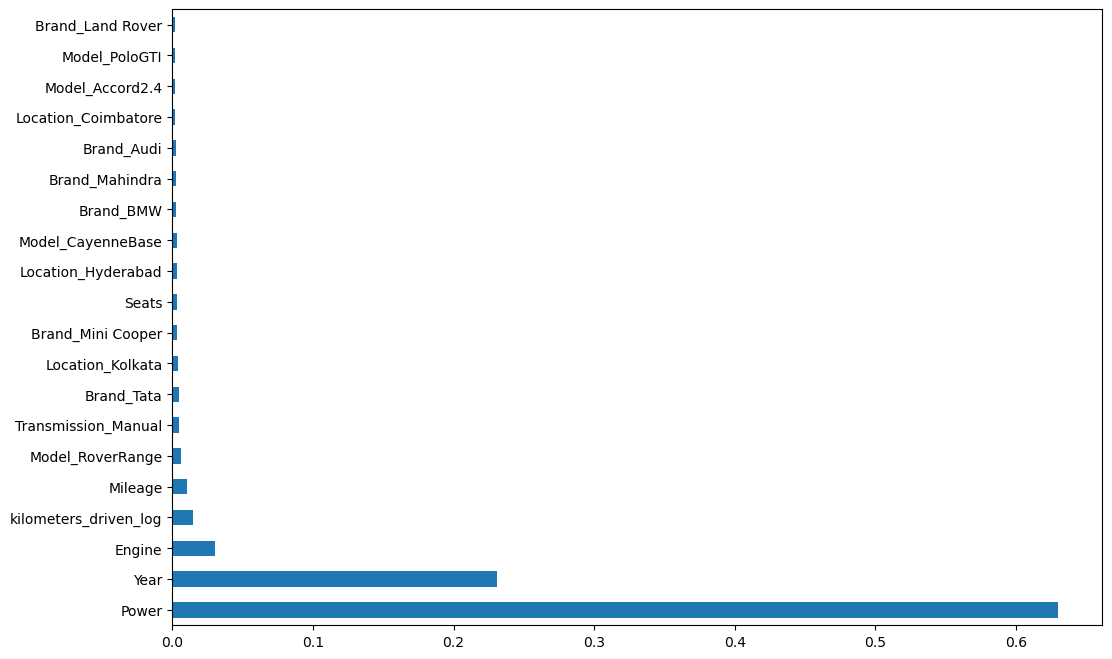

In [59]:
#plot graph of feature importances for Decision Tree for better analysis

plt.figure(figsize = (12,8))
feat_importances = pd.Series(dtree.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

**Observations and insights: _____**

Gini importance is a measure of the importance of each feature (predictor variable) in a decision tree or random forest model. It is calculated by measuring the decrease in the Gini impurity of the node when a feature is used to split the data, and averaging the results over all of the trees in the forest. Gini impurity is a measure of how often a randomly chosen element from the set would be incorrectly labeled if it were randomly labeled according to the distribution of labels in the subset. Lower Gini impurity indicates a more pure subset of the data, and therefore a feature with a high Gini importance is considered to be more important in the prediction of the target variable.

The feature with the highest score, "Power" in this case, is considered to be the most important feature in the model. 
The feature with the second highest score, "Year" in this case, is considered to be the second most important feature and so on. 

The low Gini importance values of "Engine", "kilometers_driven_log" and "Mileage" indicate that these features may not be as important in the prediction of the target variable as the other features.

### **Random Forest**

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [60]:
# Import Randomforest for Regression from sklearn
from sklearn.ensemble import RandomForestRegressor

In [61]:
# Create a Randomforest regression model 
clf = RandomForestRegressor(n_estimators=100)

In [62]:
# Fit Randomforest regression model
clf.fit(X_train, y_train['price_log'])

RandomForestRegressor()

In [63]:
# Get score of the model
clf_model = get_model_score(clf)

R-square on training set :  0.9836085971253327
R-square on test set :  0.8721627900542882
RMSE on training set :  1.4594372129450788
RMSE on test set :  3.791241345004471


**Observations and insights: _____**

The R-squared values on the training and test sets are high and low, respectively. This suggests that the model is overfitting to the training data and not generalizing well to the test data. 

The RMSE values on the training and test sets are also low and high, respectively, further confirming overfitting.

**Feature Importance**

In [64]:
# Print important features similar to decision trees
print(pd.DataFrame(clf.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                            Imp
Power                  0.623783
Year                   0.228127
Engine                 0.031150
kilometers_driven_log  0.015967
Mileage                0.013121
...                         ...
Model_BoxsterS         0.000000
Model_IndigoXL         0.000000
Model_SantroDX         0.000000
Model_ScorpioS2        0.000000
Model_Superb2.5        0.000000

[738 rows x 1 columns]


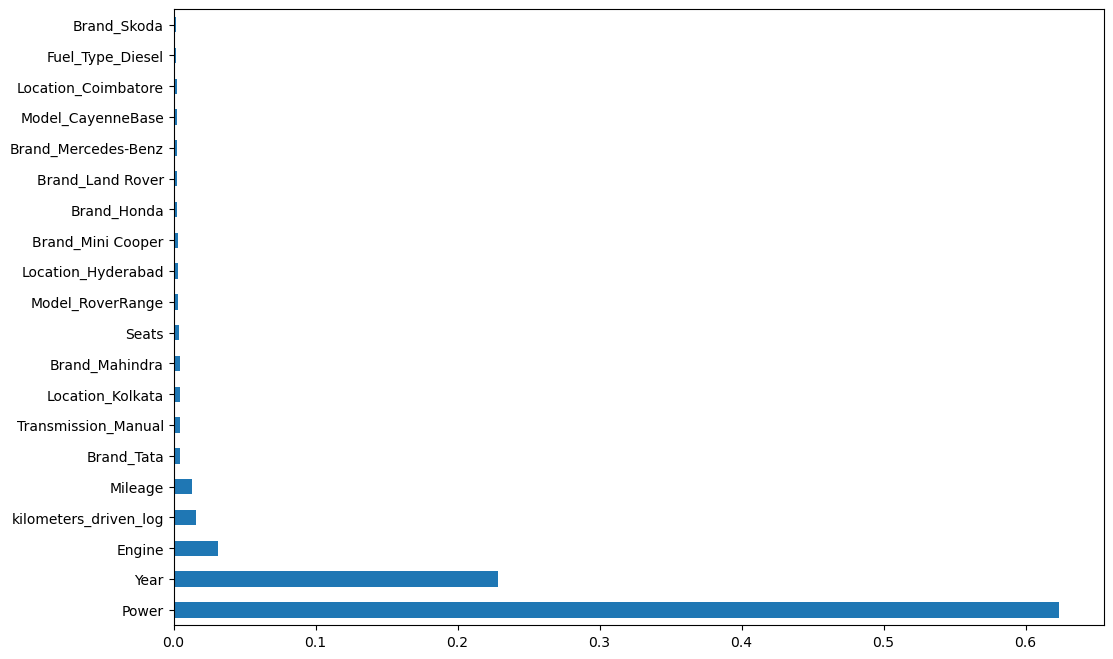

In [65]:
#plot graph of feature importances for Random Forest for better analysis

plt.figure(figsize = (12,8))
feat_importances = pd.Series(clf.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

**Observations and insights: _____**

Not much difference in values between Decision Tree and Random Forest.
Both indicate overfitting.


### **Hyperparameter Tuning: Decision Tree**

In [66]:
#To tune a decision tree, we use the following parameters:

# max_depth: The maximum depth of the tree. Increasing this value will make the model more complex, 
#   while decreasing it will make the model less complex.

# min_samples_split: The minimum number of samples required to split an internal node. 
#   Increasing this value will make the model less complex, as it will require more samples to split a node.

# min_samples_leaf: The minimum number of samples required to be at a leaf node. 
#   Increasing this value will make the model less complex, 
#   as it will require more samples to be present at a leaf node.

# max_features controls the number of features that are considered when splitting a node.
#   set max_features to "auto" - DEPRICATED,  so can't use
#   set max_features to "sqrt", the algorithm will select the number of features equal to the square root of the total number of features.
#   set max_features to "log2", the algorithm will select the number of features equal to log2(total number of features).
#   set max_features is set to None, then all features will be considered when splitting a node.


In [67]:
#importing required libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score, make_scorer

# Choose the type of estimator 
dtree_tuned = DecisionTreeRegressor(random_state = 1)

# Grid of parameters to choose from
# Check documentation for all the parametrs that the model takes and play with those
parameters = {'splitter':["best","random"],
 #   'max_depth': [1, 3, 5, 7, 9, 11, 12, 15],
    'min_samples_leaf': [5, 10, 20, 25],
   # 'min_weight_fraction_leaf': [.5],
              'max_features': [None],
             }

# Type of scoring used to compare parameter combinations
scorer = 'neg_mean_squared_error'

# Run the grid search
grid_obj = GridSearchCV(estimator=dtree_tuned,param_grid=parameters, cv=10, verbose=1, scoring = scorer)

grid_obj = grid_obj.fit(X_train,y_train)

# Set the model to the best combination of parameters
dtree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
dtree_tuned.fit(X_train,y_train['price_log'])

Fitting 10 folds for each of 8 candidates, totalling 80 fits


DecisionTreeRegressor(min_samples_leaf=10, random_state=1)

In [68]:
# Get score of tuned model
dtree_tuned_model = get_model_score(dtree_tuned)

R-square on training set :  0.8892250655242453
R-square on test set :  0.7862076836289769
RMSE on training set :  3.794006794630731
RMSE on test set :  4.90285259664256


**Observations and insights: _____**

-Working with min_samples_leaf resulted in negative R-squares and high RMSE.  So I stopped tuning that parameter.
-Increasing the number of features to consider when looking for the best split resulted in better values, but still showed overfitting.
-I set max_features to None and that helped the model, but still shows overfitting.
-Tuning these feature was heavy computationally and time wise.  If I had more time, I would try other combinations.

**Feature Importance**

In [69]:
# Print important features of tuned decision tree similar to decision trees
print(pd.DataFrame(dtree_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                               Imp
Power                     0.678275
Year                      0.245198
Engine                    0.024863
Mileage                   0.010325
kilometers_driven_log     0.008252
...                            ...
Model_Endeavour3.0L       0.000000
Model_Endeavour3.2        0.000000
Model_Endeavour4x2        0.000000
Model_EndeavourHurricane  0.000000
Model_redi-GOT            0.000000

[738 rows x 1 columns]


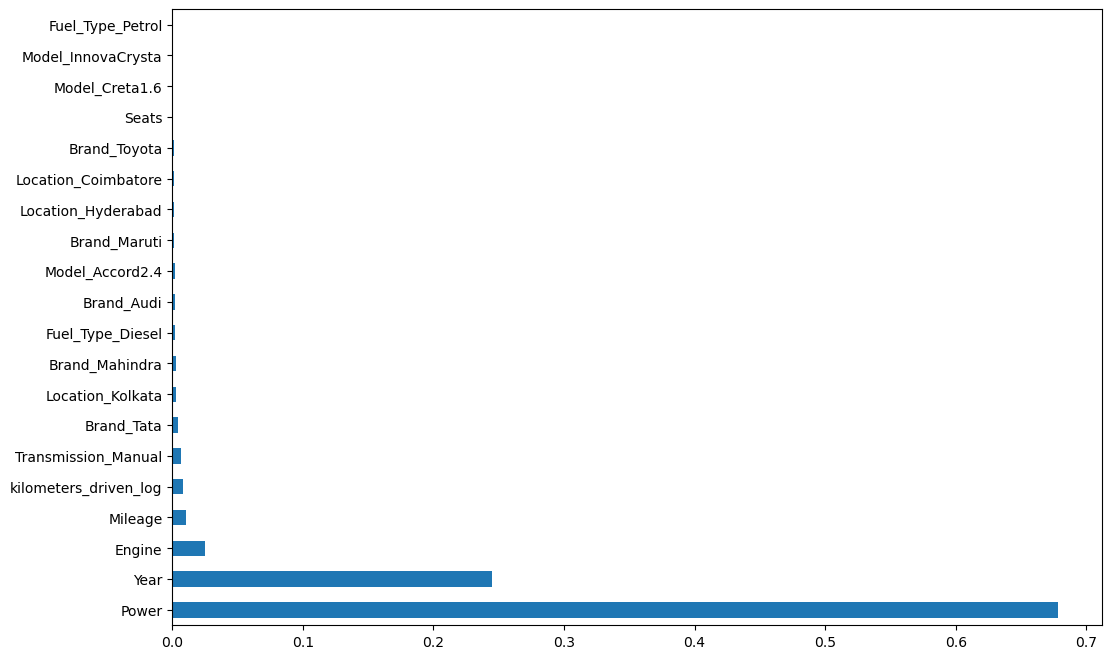

In [70]:
#plot graph of feature importances for Tuned Decision Tree for better analysis

plt.figure(figsize = (12,8))
feat_importances = pd.Series(dtree_tuned.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

**Feature Importance:**
Power is the most important variable for Price, followed by Year, Engine and Mileage.

### **Hyperparameter Tuning: Random Forest**

In [71]:
#Some Important Parameters

# n_estimatorsint, default=100  --> The number of trees in the forest.Default=100
# max_depthint, default=None --> The maximum depth of the tree.  If None, then nodes are expanded 
#    until all leaves are pure or until all leaves contain less than min_samples_split samples.
# min_samples_splitint or float, default=2 --> The minimum number of samples required to split an internal node
# min_samples_leafint or float, default=1 --> The minimum number of samples required to be at a leaf node.
# min_weight_fraction_leaffloat, default=0.0 --> The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. 
# max_features{“sqrt”, “log2”, None}, int or float, default=1.0 The number of features to consider when looking for the best split
# max_leaf_nodesint, default=None  -->  Grow trees with max_leaf_nodes in best-first fashion. 
#  Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.
# min_impurity_decreasefloat, default=0.0 --> A node will be split if this split induces a decrease of the impurity greater than or equal to this value
# max_samplesint or float, default=None --> If bootstrap is True, the number of samples to draw from X to train each base estimator.

In [72]:
# Choose the type of Regressor
randomforest_tuned = RandomForestRegressor(random_state=1)

# Define the parameters for Grid to choose from 
parameters={'max_depth': [1, 2, 3, 5, 7, 9, 10, 11, 12],
    'min_samples_leaf': [5, 10, 20, 25],
     'max_features': [None]
  }

# Check documentation for all the parametrs that the model takes and play with those:  see above
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.mean_absolute_error, greater_is_better=False)

# Create classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Run the grid search
grid_obj = GridSearchCV(estimator=randomforest_tuned,param_grid=parameters,
                        cv=10, verbose=1, scoring = scorer)
grid_obj = grid_obj.fit(X_train,y_train)

# Set the model to the best combination of parameters
randomforest_tuned=grid_obj.best_estimator_

# Fit the best algorithm to the data
randomforest_tuned.fit(X_train,y_train['price_log'])


Fitting 10 folds for each of 36 candidates, totalling 360 fits


RandomForestRegressor(max_depth=12, max_features=None, min_samples_leaf=5,
                      random_state=1)

In [73]:
# Get score of tuned model
randomforest_tuned_model = get_model_score(randomforest_tuned)

R-square on training set :  0.9209426273014948
R-square on test set :  0.8353974692885664
RMSE on training set :  3.2051513501650515
RMSE on test set :  4.3020063205316985


In [74]:
# Print important features of tuned decision tree similar to decision trees
print(pd.DataFrame(randomforest_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                            Imp
Power                  0.656538
Year                   0.240443
Engine                 0.030342
Mileage                0.014148
kilometers_driven_log  0.012575
...                         ...
Model_Fiesta1.5        0.000000
Model_Fiesta1.6        0.000000
Model_FiestaClassic    0.000000
Model_FiestaDiesel     0.000000
Model_redi-GOT         0.000000

[738 rows x 1 columns]


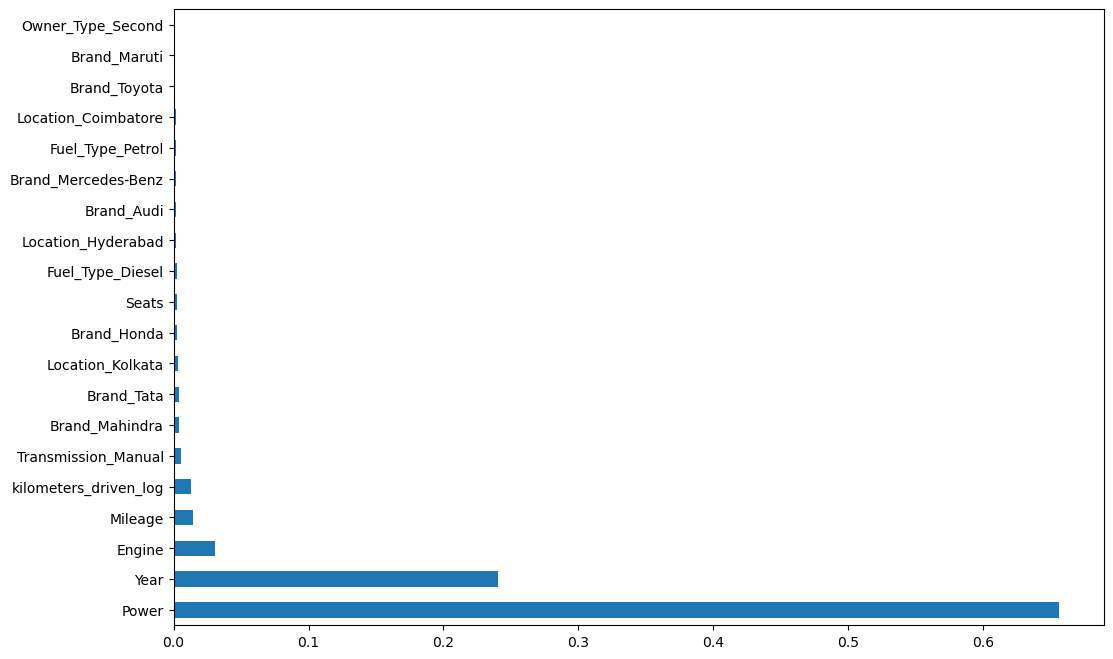

In [75]:
#plot graph of feature importances for Random Forest for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(randomforest_tuned.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

**Observations and insights: _____**
-Overall the model looks good but is still overfitting.
-Tuning these feature was heavy computationally and time wise.  If I had more time, I would try other combinations.

**Feature Importance:**
Power is the most important variable for Price, followed by Year, Engine and Mileage.

# KNN

In [76]:
# Create KNN Model 

In [77]:
from sklearn.neighbors import KNeighborsRegressor
knn= KNeighborsRegressor()
knn.fit(X_train, y_train["price_log"])
get_model_score(knn)

R-square on training set :  0.8924922061501867
R-square on test set :  0.7860474214077737
RMSE on training set :  3.7376387902590227
RMSE on test set :  4.904689881687676


[0.8924922061501867, 0.7860474214077737, 3.7376387902590227, 4.904689881687676]

In [78]:
knn_model = get_model_score(knn)

R-square on training set :  0.8924922061501867
R-square on test set :  0.7860474214077737
RMSE on training set :  3.7376387902590227
RMSE on test set :  4.904689881687676


In a non-parametric model such as KNeighborsRegressor, the feature importances cannot be determined as easily as in a parametric model like linear regression. However, there are some methods we can use to get an understanding of which features are affecting the target variable:

Feature Selection: We can use feature selection techniques like Recursive Feature Elimination (RFE) or SelectFromModel to find the most important features.

Correlation: We can calculate the correlation between the features and the target variable and select the features with the highest correlation.

Permutation Importance: We can use permutation importance to determine the feature importances by randomly shuffling the values of a single feature and measuring the impact on the model's performance.

These are just some methods to understand the feature importances in a non-parametric model like KNeighborsRegressor. Note that these methods may not be as interpretable as the coefficients in a linear regression model, but they can still provide valuable insights into the features that are affecting the target variable.


# XGBoost 

#Create XGBoost Model

In [79]:
import os
import xgboost

from xgboost import XGBRegressor
xgb = xgboost.XGBRegressor()
xgb.fit(X_train, y_train["price_log"])
get_model_score(xgb)

R-square on training set :  0.979436780937607
R-square on test set :  0.9036778306183256
RMSE on training set :  1.6346429452129905
RMSE on test set :  3.290909336003646


[0.979436780937607, 0.9036778306183256, 1.6346429452129905, 3.290909336003646]

In [80]:
xgb_model = get_model_score(xgb)

R-square on training set :  0.979436780937607
R-square on test set :  0.9036778306183256
RMSE on training set :  1.6346429452129905
RMSE on test set :  3.290909336003646


In [81]:
# Print important features of xgb
print(pd.DataFrame(xgb.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                           Imp
Power                 0.233674
Transmission_Manual   0.091888
Fuel_Type_Diesel      0.042929
Engine                0.037026
Year                  0.034153
...                        ...
Model_FiestaTitanium  0.000000
Model_FiestaEXi       0.000000
Model_Fiesta1.6       0.000000
Model_Fiesta1.5       0.000000
Model_redi-GOT        0.000000

[738 rows x 1 columns]


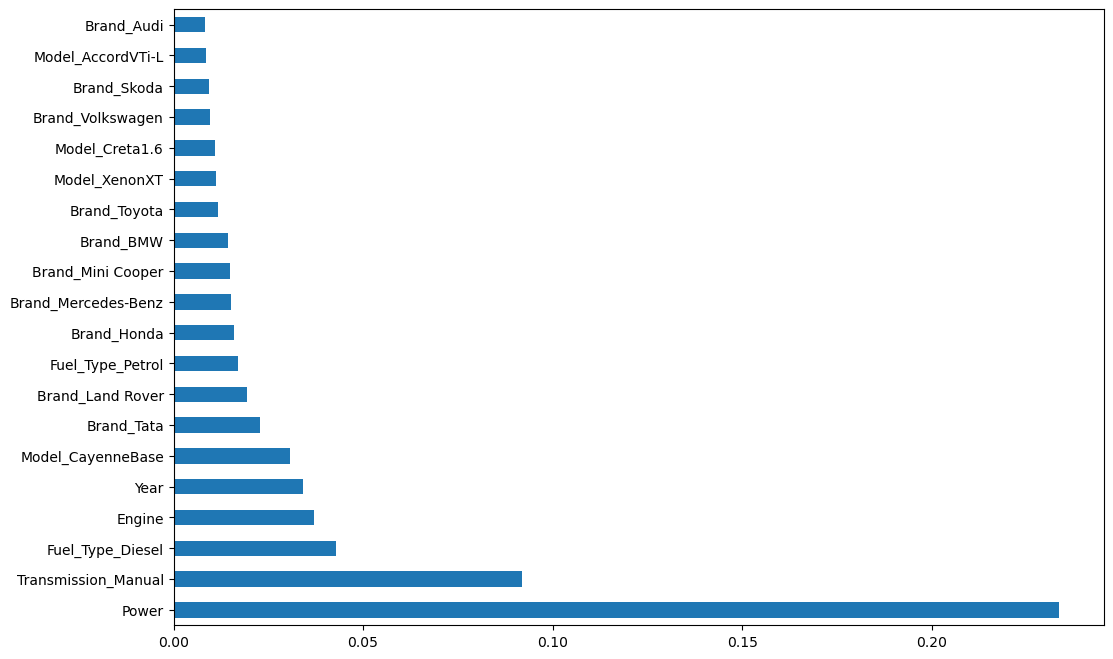

In [82]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(xgb.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [88]:
# Predict on test data
xgb_reg_y_pred = xgb.predict(X_test)

# Convert log values back to original values
xgb_reg_y_pred = np.exp(xgb_reg_y_pred)


# Compare actual and predicted prices
df = pd.DataFrame({'Actual Price': y_test['Price'], 'Predicted Price': xgb_reg_y_pred})
print(df)

      Actual Price  Predicted Price
5460          2.64         2.003621
4367          2.00         2.354394
1227         19.00        26.395494
2253          4.15         4.932911
79            1.30         1.341330
...            ...              ...
188           4.60         4.570178
5218          6.55         6.288065
3884          5.00         3.820897
3978          3.75         3.920221
2698         27.50        29.573711

[1805 rows x 2 columns]


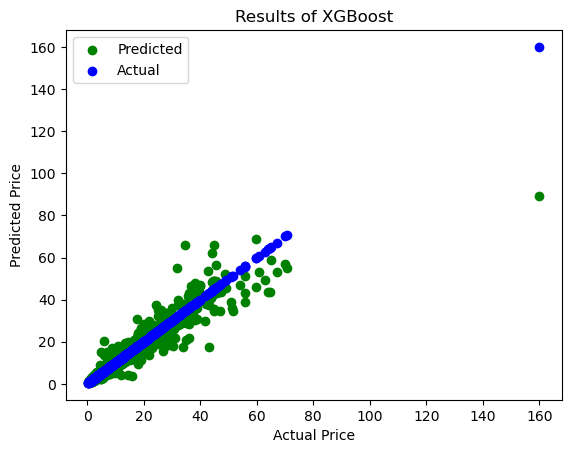

In [89]:
import matplotlib.pyplot as plt

df = pd.DataFrame({'Actual': y_test['Price'], 'Predicted': xgb_reg_y_pred})

plt.scatter(df['Actual'], df['Predicted'], c='green', label='Predicted')
plt.scatter(df['Actual'], df['Actual'], c='blue', label='Actual')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Results of XGBoost')
plt.legend(loc='best')
plt.show()

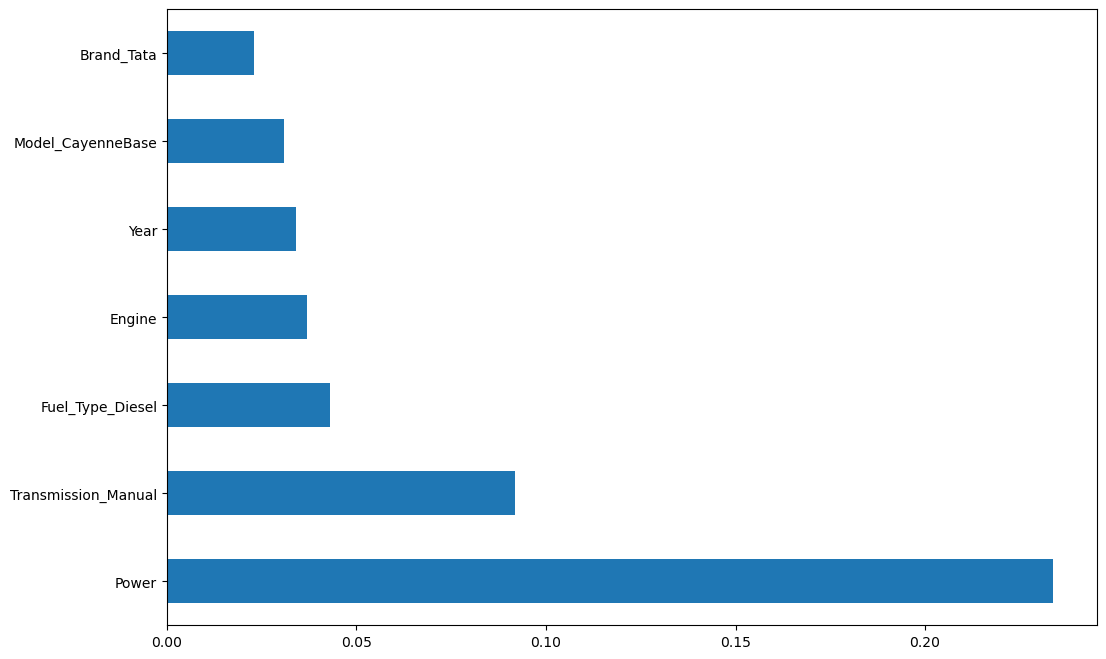

In [85]:
# get original features
original_features = list(X_train.columns)

# exclude dummy variables
dummy_features = [col for col in X_train.columns if col not in original_features]
dummy_indices = [i for i, feature in enumerate(X_train.columns) if feature in dummy_features]

# compute feature importances excluding dummy variables
importance = xgb.feature_importances_
importance[dummy_indices] = 0

# plot the top 7 feature importances of original features only
plt.figure(figsize = (12,8))
feat_importances = pd.Series(importance, index=X_train.columns)
feat_importances = feat_importances[original_features]
feat_importances = feat_importances.sort_values(ascending=False)
feat_importances[:7].plot(kind='barh')
plt.show()


#Create XGBoost Tuned Model

In [86]:
# Hyperparameter tuning for XGBoost

# from xgboost import XGBRegressor - done previously for xgboost
# from sklearn.model_selection import GridSearchCV - done for random forest

# Define the parameters to be tuned
parameters_grid_xgb = {'learning_rate': [0.1, 0.01, 0.001], 
              'max_depth': [3, 5, 7], 
              'subsample': [0.6, 0.8, 1.0],
              'gblinear': ['gblinear'],
              'random_state' : [1],
              'objective': ["reg:squarederror"],
              'base_score': [0.2, 0.3, 0.5, 0.6]
               }

#parameters_grid_xgb = {'n_estimators': [100, 300, 500],
#              'learning_rate': [0.1, 0.01, 0.001], 
#              'max_depth': [3, 5, 7], 
#              'subsample': [0.6, 0.8, 1.0]}

# Create the grid search object
xgb_tuned = XGBRegressor()
grid_search = GridSearchCV(xgb_tuned, parameters_grid_xgb, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train["price_log"])

# Train a new XGBoost model with the best hyperparameters
xgb_tuned = xgboost.XGBRegressor(max_depth=grid_search.best_params_['max_depth'],  
                             learning_rate=grid_search.best_params_['learning_rate'])
xgb_tuned.fit(X_train, y_train["price_log"])

# Print the best parameters and the best score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[23:22:28] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gblinear" } are not used.

Best parameters:  {'base_score': 0.2, 'gblinear': 'gblinear', 'learning_rate': 0.1, 'max_depth': 7, 'objective': 'reg:squarederror', 'random_state': 1, 'subsample': 0.6}
Best score:  0.9437869065135688


In [80]:
xgb_tuned_model = get_model_score(xgb_tuned)

R-square on training set :  0.9753569578882522
R-square on test set :  0.900043951077762
RMSE on training set :  1.7894703752028756
RMSE on test set :  3.3524115677680077


In [81]:
print(xgb_tuned.feature_importances_)

[4.82342169e-02 3.04709561e-03 2.69879419e-02 2.22238347e-01
 4.91382927e-03 2.49591423e-03 4.70170705e-03 1.37657986e-03
 4.91037639e-03 1.67038862e-03 5.50906779e-03 2.65574083e-03
 1.27263251e-03 7.44793704e-03 1.92655041e-03 2.90573016e-03
 1.81476008e-02 0.00000000e+00 1.58035532e-02 4.96353023e-02
 1.48158043e-03 2.08656117e-03 4.32528974e-03 6.34489348e-03
 1.12624569e-02 0.00000000e+00 6.01363275e-03 9.86020779e-04
 3.19298799e-03 0.00000000e+00 3.20846494e-03 1.80704109e-02
 5.44862822e-03 0.00000000e+00 2.58290302e-03 1.68080023e-03
 0.00000000e+00 1.30774146e-02 1.46347173e-02 2.51906924e-03
 1.25941569e-02 1.33351181e-02 6.44829241e-04 2.77831568e-03
 2.87809037e-03 3.77682899e-03 1.17079755e-02 0.00000000e+00
 1.46692265e-02 7.55658373e-03 7.60357082e-03 3.30722588e-03
 0.00000000e+00 3.23502510e-03 3.90503160e-03 0.00000000e+00
 1.39414729e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 9.677844

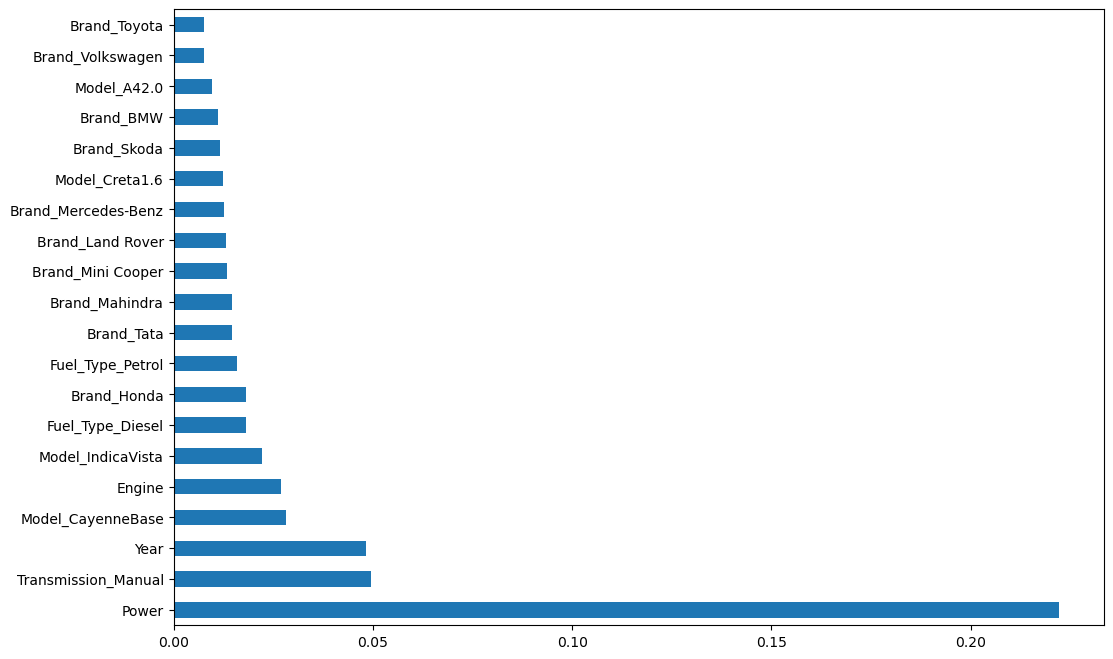

In [90]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(xgb_tuned.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

# ADABoost

In [91]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_regression

# define model
ada_regr = AdaBoostRegressor (random_state= 0) 

# Fitting the model
ada_regr.fit(X_train, y_train['price_log'])
AdaBoostRegressor(n_estimators=100, random_state= 0)

# Model Performance on the test data
ada_score = get_model_score(ada_regr)

R-square on training set :  0.697458964788525
R-square on test set :  0.6681917030759577
RMSE on training set :  6.270028252038547
RMSE on test set :  6.107963185948226


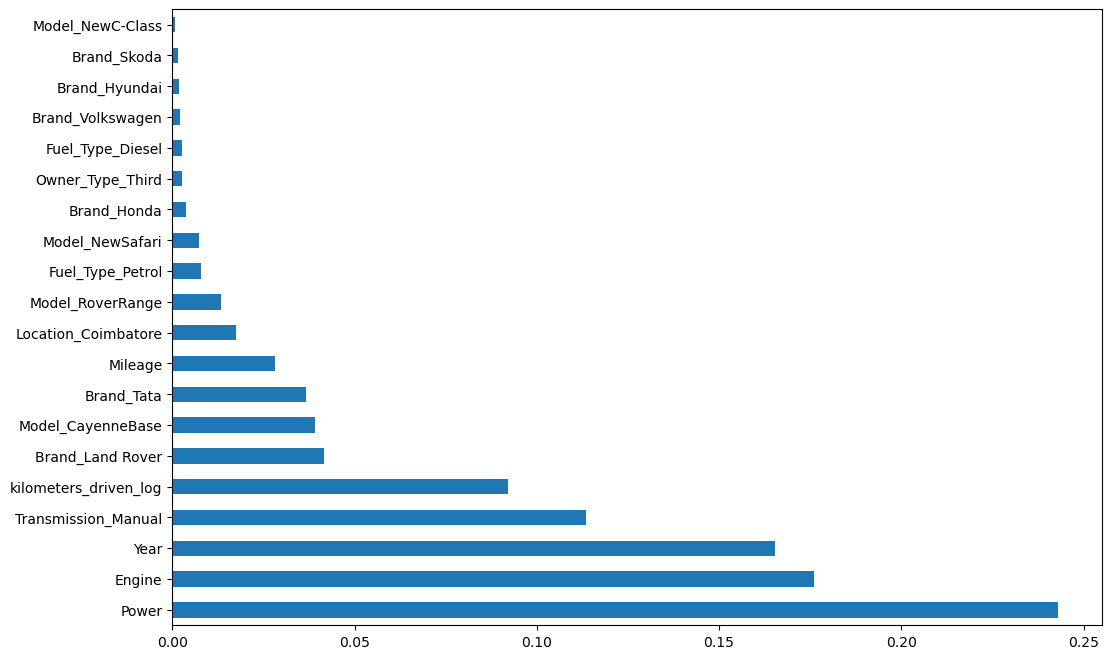

In [92]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(ada_regr.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

# GradientBoost

In [93]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import make_regression

# define model
gradient_reg = GradientBoostingRegressor(random_state=0)

# Fitting the model
gradient_reg.fit(X_train, y_train['price_log'])
GradientBoostingRegressor(random_state=0)

# Model Performance on the test data
gradient_score = get_model_score(gradient_reg)

R-square on training set :  0.916006981282117
R-square on test set :  0.8558999137194322
RMSE on training set :  3.3036874114402477
RMSE on test set :  4.025176333238123


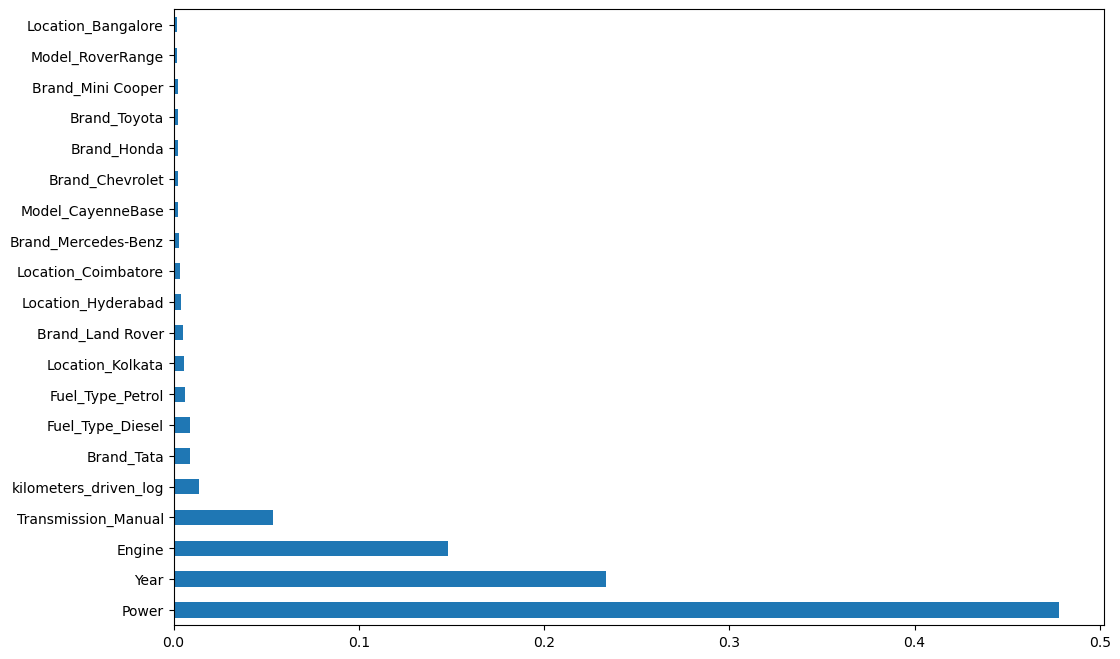

In [94]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(gradient_reg.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

# Comparison of Models

**Observations and insights: ______**

In [96]:
# Defining list of models you have trained

#models = [lr, olsmodel1, olsmodel2, dtree, ridge, dtree_tuned,clf, randomforest_tuned,knn,xgb,ada_regr,gradient_reg]
models = [lr,ridge,dtree,dtree_tuned, clf,randomforest_tuned,knn,xgb,xgb_tuned, ada_regr,gradient_reg]


# Defining empty lists to add train and test results
r2_train = []
r2_test = []
rmse_train = []
rmse_test = []

# Looping through all the models to get the rmse and r2 scores
for model in models:
    
    # Accuracy score
    j = get_model_score(model, False)
    
    r2_train.append(j[0])
    
    r2_test.append(j[1])
    
    rmse_train.append(j[2])
    
    rmse_test.append(j[3])

ValueError: y_true and y_pred have different number of output (1!=2)

In [97]:
# We exclude OLS (R2 and Adjusted R2) and Lasso from the comparison as they are not good contenders for the model

# comparison_frame = pd.DataFrame({'Model':['Linear Regression','OLS - R2', 'OLS - AdjR2','Decision Tree', 'Ridge','Tuned Decision Tree','Tuned Random Forest','KNN','XGBoost','ADABoost', 'GradiantBoost'], 
#                                         'Train_r2': r2_train,'Test_r2': r2_test,
#                                         'Train_RMSE': rmse_train,'Test_RMSE': rmse_test}) 

comparison_frame = pd.DataFrame({'Model':['Linear Regression','Ridge','Decision Tree', 'Tuned Decision Tree','Random Forest','Tuned Random Forest','KNN','XGBoost','XGBoost Tuned','ADABoost', 'GradiantBoost'], 
                                          'Train_r2': r2_train,'Test_r2': r2_test,
                                          'Train_RMSE': rmse_train,'Test_RMSE': rmse_test})                         
                        
comparison_frame

ValueError: All arrays must be of the same length

In [98]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))

# Set the width of the bar
barWidth = 0.4
 
# Set the position of the bars
bar1 = np.arange(len(comparison_frame))
bar2 = [x + barWidth for x in bar1]

# Create the bars for R2
colors = ['blue', 'red', 'green', 'yellow']
plt.bar(bar1, comparison_frame['Train_r2'], width=barWidth, edgecolor='black', label='Train R-squared', color=[0.68, 0.85, 0.90])
plt.bar(bar2, comparison_frame['Test_r2'], width=barWidth, edgecolor='black', label='Test R-squared', color=[1.00, 0.80, 0.60])

# Create the bars for RMSE
plt.bar(bar1, comparison_frame['Train_RMSE'], width=barWidth, edgecolor='black', label='Train RMSE', bottom=comparison_frame['Train_r2'])
plt.bar(bar2, comparison_frame['Test_RMSE'], width=barWidth, edgecolor='black', label='Test RMSE', bottom=comparison_frame['Test_r2'])

# Add axis labels and a title
plt.xlabel('Model')
plt.ylabel('Values')
plt.title('Comparison of R-squared and RMSE Values ')

# Set the x-axis tick labels
plt.xticks([r + barWidth/2 for r in range(len(comparison_frame))], comparison_frame['Model'], rotation=45)

# Create the legend
plt.legend()

# Show the plot
plt.show()


NameError: name 'comparison_frame' is not defined

<Figure size 1500x500 with 0 Axes>

In [99]:
# Exclude OLS (both R2 and Adjusted R2) and Lasso from graphic as they are throwing off the visualization and are not good contenders for the model

**Observations: _____**

We completly excluded 3 of the 15 models from the analysis since the results were pretty bad (OLS (both R2 and Adjusted R2) and Lasso).  Almost all other the models had similar R2 or adjusted R2 values.  The variation occured in the RMSE values.  Our criteria was to endsure R2 values were closest to 1, and the RMSE values were close.  

# Conclusions

**Note:** You can also try some other algorithms such as KNN and compare the model performance with the existing ones.

### **Insights**

**REFINED INSIGHTS:**:
- What are the most meaningful insights from the data relevant to the problem?

Based on the data, the most common factors affecting the price of a used car are Power, Year, Engine and Mileage. It is particularly interesting that Power appeared as the most important factor, except for in SKLearn linear regression.  Based on previous domain knowledge, I would expect Year to be most significant, followed by Year.  

**COMPARISON OF TECHNIQUES AND THEIR RELATIVE PERFORMANCE:** 
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further? 

1.  For Milestone 2, I created the following models: 
2.  Linear Regression (SKLearn)
3.  Linear Regression (Statsmodel) using R2
4.  Linear Regression (Statsmodel) using Adjusted R2
5.  Decision Tree
6.  Decision Tree Tuned
7.  Ridge
8.  Lasso
9.  Random Forest
10. Random Forest Tuned
11. KNN
12. XGBoost
13. XGBoost Tuned
14. ADA
15. Gradient

R-squared is a measure of how well the model fits the data, with a value of 1 indicating a perfect fit. A higher R-squared value indicates that the model is a better fit for the data.  RMSE measures the difference between the predicted and actual values and a lower value indicates a better fit. The following is an ordered ranking from worst to best of the models:

0. OLS R2, OLS R2 Adjusted and Lasso dropped from the comparison as they are not good contenders for the model.
1. Linear Regression, has good Train_r2 score but mediocre Test_r2 and Test_RMSE scores.
2. Decision Tree, has very high Train_r2 score and low Train_RMSE but low Test_r2 and high Test_RMSE, indicating overfitting.
3. Ridge, has a good balance between Train_r2 and Test_r2 scores and relatively low Test_RMSE.
4. Tuned Decision Tree, has lower Train_r2 and Test_r2 scores and higher Test_RMSE compared to other models.
5. Tuned Random Forest, has similar performance as Ridge.
6. KNN, has low Train_r2 and Test_r2 scores and high Test_RMSE.
7. ADABoost, has low Train_r2 and Test_r2 scores and high Test_RMSE, indicating poor performance.
8. GradientBoost, has relatively good Train_r2 and Test_r2 scores and low Test_RMSE.
9. XGBoost is the best model to present for a used car price prediction task.


**SCOPE FOR IMPROVEMENT:**

Based on the given test R2 and test RMSE values for the XGBoost model, it appears that there is some scope for improvement. The XGBoost model has a test R2 of 0.903678 and a test RMSE of 3.290909. These metrics indicate that the model is not perfectly capturing the target variable, and there may be some room for improvement.

FURTHER IMPROVEMENT:

Feature selection: I could look at other methods and perform Recursive Feature Elimination to remove features that have a low impact on the model and can improve its performance and reduce overfitting. The algorithm works by removing the least important features based on the weights or coefficients of the model, and the process can be repeated until a desired number of features is reached.

Data augmentation: I could generate more data by using techniques such as random rotations, shifts, and flips to increase the size of my dataset and reduce overfitting.

Feature Engineering: I could look at improving the quality and relevance of the features. This could involve creating new features from existing ones, transforming features, or removing irrelevant or redundant features. For example, we could elminate Owner, which does not appear as a high runner feature.

Further hyperparameter tuning: XGBoost has several hyperparameters that can be tuned to improve its performance. Some of these include tuning the learning rate, number of trees, maximum depth of trees, and others to find the optimal values for the dataset. I tried a number of combinations, and they resulted in similar values as the non-tuned model. Tuning these feature was heavy computationally and time wise.  If I had more time, I would try other combinations to determine the one that results in the best performance.


**PROPOSAL FOR FINAL SOLUTION DESIGN**:
- What model do you propose to be adopted? Why is this the best solution to adopt?

FINAL SOLUTION DESIGN

About XGBoost:

XGBoost (eXtreme Gradient Boosting) is an open-source software library that provides a fast and efficient implementation of gradient boosting for machine learning. XGBoost, it is an ensemble method based on the gradient boosting algorithm, which is an iterative optimization process that adjusts the weights of the weak models so that the combined predictions minimize a loss function, such as mean squared error for regression. By training a sequence of weak models, where each subsequent model aims to correct the errors of the previous model, the final prediction is made by combining the predictions of all the individual models. In XGBoost, the individual models are decision trees which are created in sequential form. Weights are assigned to all the independent variables which are then fed into the decision tree which predicts results. The weight of variables predicted wrong by the tree is increased and these variables are then fed to the second decision tree. By increasing the weight of misclassified instances, subsequent trees in the ensemble put more emphasis on correctly classifying these instances, which helps to improve the overall accuracy of the model. This is a key aspect of the boosting technique used in XGBoost. These individual classifiers/predictors then ensemble to give a strong and more precise model. More generally, it can work on regression, classification, ranking, and user-defined prediction problems.  
https://www.geeksforgeeks.org/xgboost/


Recommendation:

We conducted exploratory data analytics (EDA) analysis on the used_car dataset. We then created 13 linear regression models and evaluated their success outcomes (R2 and RMSE values). Our investigation revealed that XGBoost is the best way to predict the price of a used car based on the Data Dictionary provided for the following reasons:

Handling of numerical and categorical features: XGBoost handled both numerical and categorical features, making it well-suited for this problem as it handled the numerical features such as "Year", "Kilometers_driven", "Mileage", "Engine", "Power", and "New_Price", as well as categorical features such as "Location", "Fuel_Type", "Transmission", "Owner", and "Seats".

Model interpretability: XGBoost provided built-in feature importance scores and visualization tools, which helped to understand the relative importance of different features in determining the price of a used car. This made it easier to understand and communicate the results of my model, as well as to identify potential areas for improvement. 

Non-linear relationships: XGBoost handled non-linear relationships between features and target outcomes, which is important as the relationship between features such as "Kilometers_driven", "Engine", and "Power" and the target "Price" are likely to be non-linear.

Handling of missing values: XGBoost can handle missing values, which may be present in the dataset, making it a versatile tool for regression tasks. While we handled missing values in Milestone 1, it is useful to know that this is the case for future data analysis.

Performance: XGBoost is known for its fast training speed and high prediction , which makes it well-suited for large datasets. Since I am not familier with how long it should take to run, I am citing this as a general advantage of XGBoost.

Scalability:  From the literature, one of the key strengths of XGBoost is its scalability. It can handle datasets with millions of examples and thousands of features, making it a popular choice for working with big data. Additionally, XGBoost has a number of advanced features that make it a highly customizable and flexible tool, such as support for parallel processing, tree pruning, and weighting of examples.  Scalability may become important as more data becomes available, and as the company correlates different databases to derive intelligent insights other than pricing.  For example, Cars4U can use the existing data and add vehicle service contract information to help determine the correct price of the extended warranty. 

Handling complexity:  Ensemble methods are particularly useful when dealing with complex, non-linear relationships between features and target outcomes. By combining the predictions of multiple models, ensemble methods can often achieve higher accuracy and better generalization performance than individual models. Additionally, ensemble methods can also help to mitigate overfitting, which can be a problem when training models on large, complex datasets.  Again, this will become even more important if the business want to use other databases to provide additional value and insights to their customers.

Ease of use:  XGBoost automates the process of training individual decision trees and combining their predictions, so that you don't have to worry about manual tuning of model parameters or worry about overfitting. XGBoost also provides a number of hyperparameters that you can tune to control the size and complexity of the individual decision trees, as well as the number of trees and the learning rate used in the optimization process.

Open source:  There are several benefits to using open source machine learning models.  These advantages are true for all the models used in this milestone.  We include them here for completeness as we are asked to substantiate our recommendation for XGBoost.

Cost Effective: Open source machine learning models are free to use, which can save a significant amount of money compared to proprietary software.
a) Customizable: Since the source code is publicly available, users have the flexibility to modify and tweak the model to better suit their specific use case.
b) Large Community: Open source machine learning models often have a large and active community of contributors, which can result in regular updates and bug fixes.
c) Better Integration: Open source machine learning models can be easily integrated into other open source tools and technologies, leading to a more streamlined workflow.
d) Transparency: The transparency of open source machine learning models allows users to understand how the model works, which can help build trust in the model's predictions.

Overall, XGBoost can be a good choice for determining the price of a used car based on the above data dictionary as it can handle a variety of data types, provide insights into the relative importance of features, handle non-linear relationships, and achieve high prediction accuracy.